In [28]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, f1_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [4]:
df_train = pd.read_csv('C:/Users/M.S.Chandrashekar/Desktop/Python/Kaggle_DS/archive/cl_hr.csv')

In [5]:
df_train.head()

,Unnamed: 0,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,...,rel_exp_0,mj_dp_A,mj_dp_B,mj_dp_H,mj_dp_N,mj_dp_O,mj_dp_S,exp_scale,compsize_scale,lst_nj_scl
0,0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,...,0,0,0,0,0,0,1,1.000000,0.210998,0.25
1,1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,...,1,0,0,0,0,0,1,0.736842,0.009340,1.00
2,2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,...,1,0,0,0,0,0,1,0.210526,0.210998,0.00
3,3,33241,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,1,...,1,0,1,0,0,0,0,0.000000,0.210998,0.00
4,4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20,...,0,0,0,0,0,0,1,1.000000,0.009340,1.00


In [6]:
df_train.describe()

,Unnamed: 0,enrollee_id,city_development_index,experience,company_size,last_new_job,training_hours,target,F,M,...,rel_exp_0,mj_dp_A,mj_dp_B,mj_dp_H,mj_dp_N,mj_dp_O,mj_dp_S,exp_scale,compsize_scale,lst_nj_scl
count,19158.000000,19158.000000,19158.000000,19158.000000,13220.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,...,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000
mean,9578.500000,16875.358179,0.828848,9.924992,1835.101362,1.806608,65.366896,0.249348,0.064621,0.925410,...,0.280092,0.013206,0.017069,0.034920,0.011640,0.019887,0.903278,0.469736,0.233893,0.451652
std,5530.582564,9616.292592,0.123362,6.475460,2880.610482,1.368069,60.058462,0.432647,0.245861,0.262736,...,0.449056,0.114159,0.129530,0.183582,0.107262,0.139617,0.295587,0.340814,0.319631,0.342017
min,0.000000,1.000000,0.448000,1.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4789.250000,8554.250000,0.740000,4.000000,75.000000,1.000000,23.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.157895,0.009340,0.250000
50%,9578.500000,16982.500000,0.903000,9.000000,250.000000,1.000000,47.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.421053,0.210998,0.250000
75%,14367.750000,25169.750000,0.920000,16.000000,2500.000000,3.000000,88.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.789474,0.210998,0.750000
max,19157.000000,33380.000000,0.949000,20.000000,7500.000000,4.000000,336.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
feature_train = ['city_development_index','F', 'M', 'O', 'EU_2', 'EU_1', 'EU_0','rel_exp_1', 'rel_exp_0', 'mj_dp_A', 'mj_dp_B', 'mj_dp_H', 'mj_dp_N', 'mj_dp_O', 'mj_dp_S', 'exp_scale', 'compsize_scale', 'lst_nj_scl']

X = df_train[feature_train]

y = df_train['target']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_train.shape

(13410, 18)

### ROC AUC Random Forest 

In [22]:
params_RF = {'n_estimators':[5,10,30,50]}

RF_CV = GridSearchCV(RandomForestClassifier(), params_RF, cv=5)

RF_CV.fit(X_train,y_train)

RF_CV.best_params_

{'n_estimators': 50}

In [53]:
RF_model = RandomForestClassifier(n_estimators =50)

RF_model.fit(X_train, y_train)

y_pred = RF_model.predict(X_test)

y_pred_p = RF_model.predict_proba(X_test)

roc_auc_score(y_test, y_pred_p[:,1])

0.746514700547056

In [54]:
importance_RF = RF_model.feature_importances_

for i,v in enumerate(importance_RF):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.41910
Feature: 1, Score: 0.00829
Feature: 2, Score: 0.00875
Feature: 3, Score: 0.00303
Feature: 4, Score: 0.01417
Feature: 5, Score: 0.00643
Feature: 6, Score: 0.01127
Feature: 7, Score: 0.01018
Feature: 8, Score: 0.01034
Feature: 9, Score: 0.00401
Feature: 10, Score: 0.00418
Feature: 11, Score: 0.00594
Feature: 12, Score: 0.00323
Feature: 13, Score: 0.00494
Feature: 14, Score: 0.00869
Feature: 15, Score: 0.24014
Feature: 16, Score: 0.14684
Feature: 17, Score: 0.09049


In [55]:
scores_RF = np.linspace(1,2,18)
for i,v in enumerate(importance_RF):
    scores_RF[i] = v
scores_RF

score_dict_RF = dict(zip(feature_train,scores_RF))

score_dict_RF

{'city_development_index': 0.41910225220885194,
 'F': 0.008285041244359444,
 'M': 0.008745017177221547,
 'O': 0.003025960152682762,
 'EU_2': 0.014168460078172075,
 'EU_1': 0.0064262045191218285,
 'EU_0': 0.011265910363328625,
 'rel_exp_1': 0.010178592212154922,
 'rel_exp_0': 0.010340626987066743,
 'mj_dp_A': 0.004010111141742772,
 'mj_dp_B': 0.0041827988567128115,
 'mj_dp_H': 0.005939482883063138,
 'mj_dp_N': 0.003229698563303782,
 'mj_dp_O': 0.004935507975630055,
 'mj_dp_S': 0.0086936043914612,
 'exp_scale': 0.24013627838826515,
 'compsize_scale': 0.14684359141571993,
 'lst_nj_scl': 0.09049086144114142}

<BarContainer object of 18 artists>

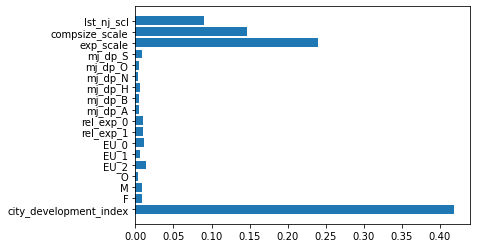

In [56]:
 plt.barh(list(score_dict_RF.keys()),list(score_dict_RF.values()))

### ROC Curve Random Forest 

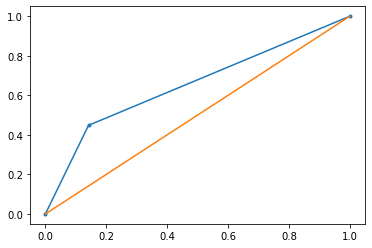

In [57]:
fpr_RF, tpr_RF, thr_RF = roc_curve(y_test, y_pred)

plt.plot(fpr_RF, tpr_RF, marker = '.')
plt.plot([0,1],[0,1])

### ROC AUC Decision Tree 

In [31]:
params = {'criterion': ['gini', 'entropy']}

DTC = GridSearchCV(DecisionTreeClassifier(),params, cv = 5)

DTC.fit(X_train,y_train)

DTC.best_params_

{'criterion': 'entropy'}

In [68]:
DT_CL = DecisionTreeClassifier(criterion = 'entropy')

DT_CL.fit(X_train, y_train)

roc_auc_score(y_test, DT_CL.predict_proba(X_test)[:,1])

0.6630479402489498

### ROC curve Decision Tree 

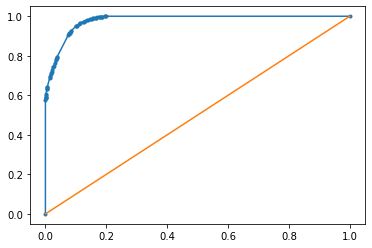

In [33]:
fpr_train_D, tpr_train_D, threshold_D = roc_curve(y_train, DT_CL.predict_proba(X_train)[:,1])

plt.plot(fpr_train_D,tpr_train_D,marker='.')
plt.plot([0,1],[0,1])

In [34]:
importanceD = DT_CL.feature_importances_

for i,v in enumerate(importanceD):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.35790
Feature: 1, Score: 0.01602
Feature: 2, Score: 0.01277
Feature: 3, Score: 0.00504
Feature: 4, Score: 0.01914
Feature: 5, Score: 0.01276
Feature: 6, Score: 0.02184
Feature: 7, Score: 0.01543
Feature: 8, Score: 0.01809
Feature: 9, Score: 0.00502
Feature: 10, Score: 0.00551
Feature: 11, Score: 0.00968
Feature: 12, Score: 0.00442
Feature: 13, Score: 0.00444
Feature: 14, Score: 0.01394
Feature: 15, Score: 0.22291
Feature: 16, Score: 0.17002
Feature: 17, Score: 0.08507


In [36]:
scores = np.linspace(1,2,18)
for i,v in enumerate(importanceD):
    scores[i] = v
scores

score_dict = dict(zip(feature_train,scores))

score_dict

{'city_development_index': 0.3579015786491953,
 'F': 0.016021463259847088,
 'M': 0.012773492585273112,
 'O': 0.005042598716052221,
 'EU_2': 0.019139094358369295,
 'EU_1': 0.012755220821563568,
 'EU_0': 0.02184193320745826,
 'rel_exp_1': 0.015432452491526454,
 'rel_exp_0': 0.01808909390255279,
 'mj_dp_A': 0.005017855347561185,
 'mj_dp_B': 0.0055140291908089695,
 'mj_dp_H': 0.009678045168032506,
 'mj_dp_N': 0.004418651210921402,
 'mj_dp_O': 0.004438926778637076,
 'mj_dp_S': 0.013935176976468408,
 'exp_scale': 0.22291126132946554,
 'compsize_scale': 0.170017013473321,
 'lst_nj_scl': 0.085072112532946}

<BarContainer object of 18 artists>

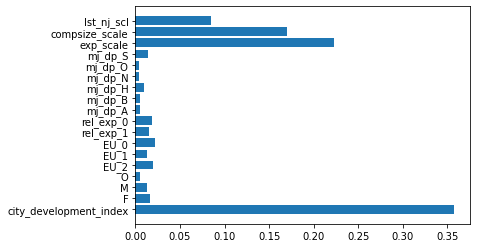

In [37]:
 plt.barh(list(score_dict.keys()),list(score_dict.values()))